Predicting images in './new-img'...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


c:\Users\shini\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 28 variables whereas the saved optimizer has 54 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


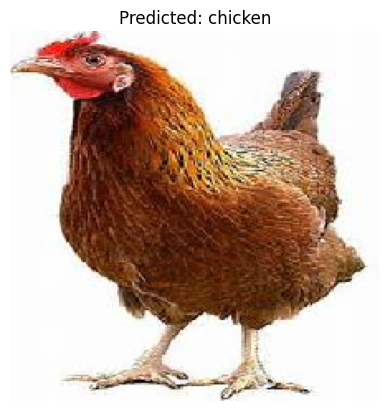

Image: 2.jpeg -> Predicted Animal: chicken
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


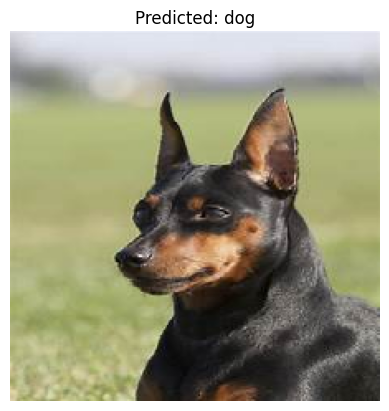

Image: OIP-_2Itmpob3Q0nbJKrHvtnfAHaJ3.jpeg -> Predicted Animal: dog


In [1]:
import tensorflow as tf
import os
from tensorflow import keras
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import json

# Load the save trained model, so that we don't have to train the model over and over again
# animal_classifier_model.h5
# animal_classifier_model.keras
MODEL_PATH = "animal_classifier_model.keras"
model = tf.keras.models.load_model(MODEL_PATH)

LABELS_PATH = "animal_labels.json"
with open(LABELS_PATH, "r") as file:
    class_labels = json.load(file)

NEW_IMG_DIR = "./new-img"
IMG_SIZE = (224, 224)   # as used in training

def predict_animal(image_path):
    """
    Predict the animal in the given image(s).
    Args:
        image_path(str): Path to the images file.
    Returns:
        str: Predicted label for the image
        tf.load_img(): image
    """

    img = tf.keras.preprocessing.image.load_img(image_path, target_size = IMG_SIZE)
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis = 0)

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis = 1)[0]

    return class_labels[str(predicted_class)], img


def main():
    if not os.path.exists(NEW_IMG_DIR):
        print(f"Error: Directory '{NEW_IMG_DIR}' does not exist.")
        return
    
    img_files = [f for f in os.listdir(NEW_IMG_DIR) if f.lower().endswith((('.png', '.jpg', '.jpeg')))]

    if not img_files:
        print(f"No image files found in directory '{NEW_IMG_DIR}'.")
        return
    
    # Predict each image
    print(f"Predicting images in '{NEW_IMG_DIR}'...")
    for img_file in img_files:
        img_path = os.path.join(NEW_IMG_DIR, img_file)
        predicted_label, img = predict_animal(img_path)
        
        plt.imshow(img)
        plt.title(f"Predicted: {predicted_label}")
        plt.axis("off")
        plt.show()

        print(f"Image: {img_file} -> Predicted Animal: {predicted_label}")
    return

main()